In [8]:
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Source
from sklearn import tree
from IPython.display import SVG



## Project Settings

Specified here are the paths for the data and the features to run over in the list of best features.
Each entry in the list is a list containing one single string of the features to try, comma seperated. In this way it is easy to write a script to 
add entries to try very easily. 

In [9]:

##### set parameters
path_train_data = 'train.csv'
path_test_data = 'test.csv'
path_all_data = 'Dataset Correlated Removed.csv'

# set features here

best_features = s = [['nof_OH, nof_NH2, nof_SO3H, C_R0, molCharge_total, PSA/Area, molPSA'],
     ['nof_SH, nof_SO3H, nof_PO4, nof_Fragments, posCharge/Volume, nof_posCharge, molPSA'],
     ['nof_acetyl, nof_OH, nof_Fragments, nof_posCharge, nof_Chirals, PSA/Area, molLogS'],
     ['nof_NH2, posCharge/Volume, C_R0, nof_negCharge, PSA/Area, molPSA, molLogP'],
     ['nof_acetyl, nof_NH2, nof_PO4, negCharge/Volume, C_R1, nof_posCharge, PSA/Area'],
     ['nof_OH, nof_NH2, nof_SH, nof_SO3H, nof_Fragments, posCharge/Volume, molPSA'],
     ['nof_OH, nof_COOH, nof_NH2, nof_SH, nof_Fragments, nof_posCharge, molPSA'],
     ['nof_OH, nof_NH2, nof_SO3H, posCharge/Volume, nof_negCharge, PSA/Area, molPSA'],
     ['nof_NH2, posCharge/Volume, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS'],
     ['nof_NH2, nof_SO3H, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS'],
     ['nof_NH2, nof_SO3H, nof_PO4, C_R0, nof_Chirals, PSA/Area, molLogS'],
     ['nof_OH, nof_NH2, posCharge/Volume, nof_negCharge, PSA/Area, molPSA, molLogS'],
     ['nof_COOH, nof_Fragments, nof_posCharge, molCharge_total, PSA/Area, molLogS, molLogP'],
     ['nof_NH2, nof_SO3H, negCharge/Volume, posCharge/Volume, nof_Chirals, PSA/Area, molLogS'],
     ['nof_OH, nof_NH2, nof_SH, posCharge/Volume, C_R0, PSA/Area, molLogS'],
     ['nof_OH, nof_NH2, negCharge/Volume, posCharge/Volume, C_R0, PSA/Area, molLogS'],
     ['nof_OH, nof_COOH, posCharge/Volume, C_R0, nof_posCharge, PSA/Area, molLogP'],
     ['nof_OH, nof_NH2, nof_SO3H, posCharge/Volume, nof_negCharge, PSA/Area, molLogP'],
     ['nof_OH, nof_NH2, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogP'],
     ['nof_OH, nof_NH2, nof_PO4, negCharge/Volume, PSA/Area, molPSA, molLogS'],
     ['nof_OH, nof_SO3H, posCharge/Volume, C_R0, nof_negCharge, PSA/Area, molLogP'],
     ['nof_OH, nof_NH2, nof_PO4, molCharge_total, PSA/Area, molPSA, molLogS'],
     ['nof_OH, nof_NH2, nof_SO3H, negCharge/Volume, C_R0, PSA/Area, molLogS'],
     ['nof_NH2, nof_SO3H, posCharge/Volume, nof_posCharge, nof_Chirals, molPSA, molLogS'],
     ['nof_OH, nof_SH, nof_SO3H, C_R0, nof_negCharge, PSA/Area, molLogP'],
     ['nof_OH, nof_SO3H, nof_PO4, nof_Fragments, PSA/Area, molLogS, molLogP'],
     ['nof_OH, nof_NH2, nof_SH, negCharge/Volume, C_R0, PSA/Area, molLogS'],
     ['nof_OH, nof_COOH, C_R0, nof_posCharge, PSA/Area, molLogP, molWeight'],
     ['nof_OH, nof_COOH, nof_NH2, nof_SO3H, nof_Fragments, molPSA, molWeight'],
     ['nof_OH, nof_NH2, nof_Fragments, nof_negCharge, nof_posCharge, molPSA, molWeight'],
     ['nof_acetyl, nof_OH, nof_NH2, nof_Fragments, molCharge_total, molPSA, molWeight'],
     ['C_R1, nof_posCharge, Complexity, molCharge_total, nof_Chirals, PSA/Area, molLogP'],
     ['nof_OH, nof_NH2, nof_PO4, nof_Fragments, nof_posCharge, molPSA, molLogS'],
     ['nof_NH2, nof_SH, nof_Fragments, posCharge/Volume, C_R1, nof_negCharge, molWeight'],
     ['nof_OH, nof_NH2, nof_SH, nof_Fragments, nof_posCharge, molPSA, molWeight'],
     ['nof_OH, nof_COOH, nof_NH2, nof_Fragments, nof_posCharge, molPSA, molWeight']]


best_features = [list(map(str.strip, x[0].split(','))) for x in best_features]

k = len(best_features)


## Load Dataset

This code loads dataset into the variables below and converts the labels to categorical 0, 1 pairs.

In [10]:
# load dataset
all_data = pd.DataFrame(pd.read_csv(path_all_data))
all_labels = all_data['SLC'].astype('category').cat.codes
# drop labels
all_data.drop('SLC', axis=1, inplace=True)

train_data = pd.DataFrame(pd.read_csv(path_train_data))
train_labels = train_data['SLC'].astype('category').cat.codes
# drop labels

train_data.drop('SLC', axis=1, inplace=True)

test_data = pd.DataFrame(pd.read_csv(path_test_data))
test_labels = test_data['SLC'].astype('category').cat.codes
# drop labels
test_data.drop('SLC', axis=1, inplace=True)


## AUC and Classification Accuracy - Decision Tree

The code below will find the classification accuracy using 10-fold cross-validation using stratified sampling to help class imbalance. The AUC on the test split is also found.

In [11]:
# visualize decision tree for input features
''' HYPERPARAMS FOR DECISION TREE
 
 These parameters implement a rudimentary pruning algorithm, would ideally like to use AB pruning'''
enable_pruning = True
# maximum depth of dtree
max_depth = 5
# how many samples your need atleast, at a LEAF node
min_samples = 3

d_trees = []


# find CA - uses 10-fold cross validation 
# with stratified sampling to help with class imbalance
# and simple average over subsets
dt_cas = []

for i in range(k):
    aucs = []
    # make fold
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    for trx, tex in skf.split(all_data, all_labels):
        # strip data to required features
        subset_data = all_data.filter(best_features[i], axis=1)
        
        # find auc
        dtree = DecisionTreeClassifier(presort=True, max_depth=max_depth, min_samples_leaf=min_samples)
        dtree.fit(subset_data.iloc[trx, :], all_labels.iloc[trx])        
        pred = dtree.predict(subset_data.iloc[tex, :])
        labels = all_labels.iloc[tex]
        
        acc = roc_auc_score(labels, pred)
        # record auc to average later
        aucs.append(acc)
    
    dt_cas.append(np.mean(aucs))
    

# find AUC 
dt_aucs = []
for i in range(k):
    subset_test_data = test_data.filter(best_features[i], axis=1)
    subset_train_data = train_data.filter(best_features[i], axis=1)
    
    clf = DecisionTreeClassifier(presort=True, max_depth=max_depth, min_samples_leaf=min_samples)
    clf.fit(subset_train_data, train_labels)
    d_trees.append(clf)
    
    # make its predictions on test data
    pred = d_trees[i].predict(subset_test_data)
    
    # find auc scores
    auc = roc_auc_score(test_labels, pred)
    
    # record the scores
    dt_aucs.append(auc)
    
print('Decision Tree Results:')
print('\tAUC\tAcc\tFeatures')
for i, f in enumerate(zip(dt_aucs, dt_cas)):
    print('\t%05.3f\t%05.3f\t' % tuple(f) + ', '.join(best_features[i]))

    

Decision Tree Results:
	AUC	Acc	Features
	0.690	0.712	nof_OH, nof_NH2, nof_SO3H, C_R0, molCharge_total, PSA/Area, molPSA
	0.774	0.662	nof_SH, nof_SO3H, nof_PO4, nof_Fragments, posCharge/Volume, nof_posCharge, molPSA
	0.786	0.700	nof_acetyl, nof_OH, nof_Fragments, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.690	0.739	nof_NH2, posCharge/Volume, C_R0, nof_negCharge, PSA/Area, molPSA, molLogP
	0.774	0.686	nof_acetyl, nof_NH2, nof_PO4, negCharge/Volume, C_R1, nof_posCharge, PSA/Area
	0.821	0.663	nof_OH, nof_NH2, nof_SH, nof_SO3H, nof_Fragments, posCharge/Volume, molPSA
	0.821	0.724	nof_OH, nof_COOH, nof_NH2, nof_SH, nof_Fragments, nof_posCharge, molPSA
	0.702	0.642	nof_OH, nof_NH2, nof_SO3H, posCharge/Volume, nof_negCharge, PSA/Area, molPSA
	0.714	0.684	nof_NH2, posCharge/Volume, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.714	0.681	nof_NH2, nof_SO3H, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.714	0.721	nof_NH2, nof_SO3H, nof_PO4, C_R0, nof_Chirals, PSA/Area, mol

## AUC and Classification Accuracy - Random Forest Walk

The code below will find the classification accuracy using 10-fold cross-validation using stratified sampling to help class imbalance. The AUC on the test split is also found.

In [12]:
# visualize random forest features
rfws = []

# find CA - uses 10-fold cross validation 
# with stratified sampling to help with class imbalance
# and simple average over subsets
rfw_cas = []

for i in range(k):
    aucs = []
    # make fold
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    for trx, tex in skf.split(all_data, all_labels):
        # strip data to required features
        subset_data = all_data.filter(best_features[i], axis=1)
        
        # find auc
        rfwtree = RandomForestClassifier(n_estimators=100)
        rfwtree.fit(subset_data.iloc[trx, :], all_labels.iloc[trx])
        pred = rfwtree.predict(subset_data.iloc[tex, :])
        labels = all_labels.iloc[tex]
        
        acc = roc_auc_score(labels, pred)
        # record auc to average later
        aucs.append(acc)
    
    rfw_cas.append(np.mean(aucs))
    

# find AUC 
rfw_aucs = []
for i in range(k):
    subset_test_data = test_data.filter(best_features[i], axis=1)
    subset_train_data = train_data.filter(best_features[i], axis=1)
    
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(subset_train_data, train_labels)
    rfws.append(clf)
    
    # make its predictions on test data
    pred = rfws[i].predict(subset_test_data)
    
    # find auc scores
    auc = roc_auc_score(test_labels, pred)
    
    # record the scores
    rfw_aucs.append(auc)

print('Random Forest Results:')
print('\tAUC\tAcc\tFeatures')
for i, f in enumerate(zip(rfw_aucs, rfw_cas)):
    print('\t%05.3f\t%05.3f\t' % tuple(f) + ', '.join(best_features[i]))


Random Forest Results:
	AUC	Acc	Features
	0.821	0.764	nof_OH, nof_NH2, nof_SO3H, C_R0, molCharge_total, PSA/Area, molPSA
	0.833	0.702	nof_SH, nof_SO3H, nof_PO4, nof_Fragments, posCharge/Volume, nof_posCharge, molPSA
	0.810	0.796	nof_acetyl, nof_OH, nof_Fragments, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.798	0.769	nof_NH2, posCharge/Volume, C_R0, nof_negCharge, PSA/Area, molPSA, molLogP
	0.857	0.723	nof_acetyl, nof_NH2, nof_PO4, negCharge/Volume, C_R1, nof_posCharge, PSA/Area
	0.810	0.747	nof_OH, nof_NH2, nof_SH, nof_SO3H, nof_Fragments, posCharge/Volume, molPSA
	0.821	0.708	nof_OH, nof_COOH, nof_NH2, nof_SH, nof_Fragments, nof_posCharge, molPSA
	0.833	0.798	nof_OH, nof_NH2, nof_SO3H, posCharge/Volume, nof_negCharge, PSA/Area, molPSA
	0.857	0.797	nof_NH2, posCharge/Volume, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.833	0.775	nof_NH2, nof_SO3H, C_R0, nof_posCharge, nof_Chirals, PSA/Area, molLogS
	0.881	0.741	nof_NH2, nof_SO3H, nof_PO4, C_R0, nof_Chirals, PSA/Area, mol

## Visualizing individual decision trees

The tree in variable `dtree` is visualized by the cell below. We can see how it is pruned, the splitting rule, etc.

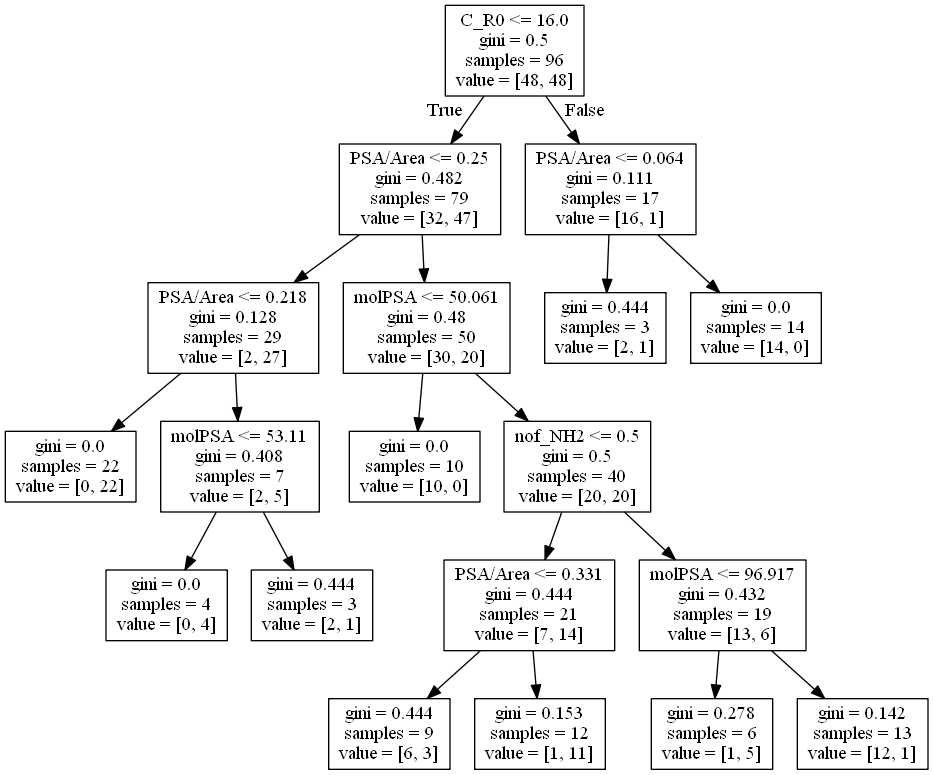

In [13]:
i = 0

dtree = d_trees[0]
graph = Source(tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
SVG(graph.pipe(format='svg'))            
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
graph.format = 'png'
graph.render('dtree_render',view=True)
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
Image(png_bytes)

## Feature importance

The feature importances are compared below for decision trees and random forests.
Reported below is code to visualize all decision trees. This requires the graphviz package and has some bugs, which will be reported. This code visualizes all decision trees and finds the feature importances for all of them.

In [14]:
i = 0
# visualization
for dtree in d_trees:
    if i < k:
        print('Feature importances for tree and forest (resp.) %s/%s:' % (i + 1, k))
        for e in zip(dtree.feature_importances_, rfws[i].feature_importances_, best_features[i]):
            print('\t%6f\t%6f\t%s' % e)
        
        try:
            graph = Source(tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
            SVG(graph.pipe(format='svg'))            
            graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
            graph.format = 'png'
            graph.render('dtree_render',view=True)
            graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=best_features[i][:dtree.n_features_]))
            png_bytes = graph.pipe(format='png')
            with open('dtree_pipe.png','wb') as f:
                f.write(png_bytes)
            Image(png_bytes)
        except:
            print('Something went wrong with rendering graph')
    else:
        print('Warning, code may be buggy')
    i += 1

Feature importances for tree and forest (resp.) 1/36:
	0.000000	0.082132	nof_OH
	0.068250	0.062197	nof_NH2
	0.000000	0.022745	nof_SO3H
	0.223460	0.236446	C_R0
	0.000000	0.047222	molCharge_total
	0.424257	0.332694	PSA/Area
	0.284032	0.216564	molPSA
Something went wrong with rendering graph
Feature importances for tree and forest (resp.) 2/36:
	0.000000	0.005957	nof_SH
	0.000000	0.024186	nof_SO3H
	0.155150	0.038972	nof_PO4
	0.605154	0.386711	nof_Fragments
	0.000000	0.110719	posCharge/Volume
	0.000000	0.052704	nof_posCharge
	0.239697	0.380751	molPSA
Feature importances for tree and forest (resp.) 3/36:
	0.000000	0.018099	nof_acetyl
	0.143122	0.071530	nof_OH
	0.261905	0.219513	nof_Fragments
	0.000000	0.045369	nof_posCharge
	0.247104	0.131878	nof_Chirals
	0.284806	0.296944	PSA/Area
	0.063063	0.216667	molLogS
Feature importances for tree and forest (resp.) 4/36:
	0.068250	0.059990	nof_NH2
	0.000000	0.068794	posCharge/Volume
	0.223460	0.178758	C_R0
	0.000000	0.036078	nof_negCharge
	0.466600	0

Feature importances for tree and forest (resp.) 33/36:
	0.178334	0.106325	nof_OH
	0.147587	0.073518	nof_NH2
	0.000000	0.026562	nof_PO4
	0.247812	0.249839	nof_Fragments
	0.000000	0.040950	nof_posCharge
	0.125583	0.235524	molPSA
	0.300685	0.267281	molLogS
Feature importances for tree and forest (resp.) 34/36:
	0.072711	0.066323	nof_NH2
	0.000000	0.005838	nof_SH
	0.106070	0.291199	nof_Fragments
	0.029579	0.104403	posCharge/Volume
	0.210342	0.139209	C_R1
	0.000000	0.047657	nof_negCharge
	0.581298	0.345371	molWeight
Feature importances for tree and forest (resp.) 35/36:
	0.083012	0.104969	nof_OH
	0.199848	0.072632	nof_NH2
	0.000000	0.004051	nof_SH
	0.099619	0.261381	nof_Fragments
	0.000000	0.059631	nof_posCharge
	0.322330	0.236260	molPSA
	0.295191	0.261077	molWeight
Feature importances for tree and forest (resp.) 36/36:
	0.083012	0.097937	nof_OH
	0.000000	0.041937	nof_COOH
	0.199848	0.065952	nof_NH2
	0.099619	0.233089	nof_Fragments
	0.000000	0.060253	nof_posCharge
	0.322330	0.228535	molPSA
